In [1]:
import scipy.spatial.distance
import numpy as np
import pandas as pd

In [2]:
#######probabbly ready, have to check#####
def effectsize_cohen(data,dataStd,refdata,phenoClass):
    
    cohen_d=0
    
    maxindex=np.argmax(data,axis=0)
    
    
    
    n,d=data.shape
    
    for cpgindex in range(d):
        class2=phenoclass.iloc[maxindex[cpgindex],:]==2
        class2_mean=np.mean(refdata.values[cpgindex,class2])
        class2_std=np.std(refdata.values[cpgindex,class2])
        
        class1=phenoclass.iloc[maxindex[cpgindex],:]==1
        class1_mean=np.mean(refdata.values[cpgindex,class1])
        class1_std=np.std(refdata.values[cpgindex,class1])
        
        SDpooled=np.sqrt((class1_std**2+class2_std**2)/2)
        
        temp_d=(class1_mean-class2_mean)/SDpooled
        cohen_d=cohen_d+temp_d
    return cohen_d
    
    
    
    

In [3]:
#######probabbly done, have to check#####

def calculate_proportion(maxindex,phenoClass):
    n,d=phenoClass.shape
    
    total_cpg=maxindex.shape[0]
    proportion_list=[0] * n
    
    
    for celltype in range(n):
        temp= np.count_nonzero(maxindex==celltype)
        proportion_list[celltype]=temp
    
    #print(proportion_list)
    minval=min(proportion_list)
    #print(minval)
    shouldbe=float(total_cpg/n)
    #print(shouldbe)
    prop_score=minval/float(shouldbe)
    
    #print (prop_score)
    return prop_score

def effectsize_cohen2(data,dataStd,refdata,phenoClass):
    
    cohen_d=0
    
    maxindex=np.argmax(data,axis=0)
    
    #print(maxindex)
    
    prop=calculate_proportion(maxindex,phenoclass)
    
    
    n,d=data.shape
    
    for cpgindex in range(d):
        class2=phenoclass.iloc[maxindex[cpgindex],:]==2
        class2_mean=np.mean(refdata.values[cpgindex,class2])
        class2_std=np.std(refdata.values[cpgindex,class2])
        
        class1=phenoclass.iloc[maxindex[cpgindex],:]==1
        class1_mean=np.mean(refdata.values[cpgindex,class1])
        class1_std=np.std(refdata.values[cpgindex,class1])
        
        SDpooled=np.sqrt((class1_std**2+class2_std**2)/2)
        
        temp_d=(class1_mean-class2_mean)/SDpooled
        cohen_d=cohen_d+temp_d
    return cohen_d*prop

In [4]:
def group_celltype(df,cluster):
    #cells = [x for x in df.columns.values if x.startswith(cluster)]
    cells=[]
   
    
    for y in df.columns.values:
        if y.find(cluster)!=-1:
            cells.append(y)
    return cells


def cellSpecific_mean(df,cellType):
    
    clusters=cellType
    sc_mean = pd.DataFrame(index=df.index.values,columns=clusters)
    for cluster in clusters:
        cells = group_celltype(df,cluster)
       
        sc_part =df.loc[:,cells]
        
        
        
        sc_mean[cluster]=pd.DataFrame(np.mean(sc_part,axis=1),index=df.index.values)
    centroids_sc_hv = sc_mean
    return centroids_sc_hv
''' this is working but not used here
def cellSpecific_median(df,cellType):
    
    clusters=cellType
    sc_mean = pd.DataFrame(index=df.index.values,columns=clusters)
    for cluster in clusters:
        cells = group_celltype(df,cluster)
       
        sc_part =df.loc[:,cells]
        
        
        
        sc_mean[cluster]=pd.DataFrame(np.median(sc_part,axis=1),index=df.index.values)
    centroids_sc_hv = sc_mean
    return centroids_sc_hv
'''
def cellSpecific_std(df,cellType):
    clusters=cellType
    sc_mean = pd.DataFrame(index=df.index.values,columns=clusters)
    for cluster in clusters:
        cells = group_celltype(df,cluster)
       
        sc_part =df.loc[:,cells]
        
        
        
        sc_mean[cluster]=pd.DataFrame(np.std(sc_part,axis=1),index=df.index.values)
    centroids_sc_hv = sc_mean
    return centroids_sc_hv
def hof_obj_values(obj,hof,largerdf,largerdfStd):
    obj_val=[]
    
    for i in range(len(hof)):
        obj_val.append(obj(largerdf[hof[i]].T.values,largerdfStd[hof[i]].T.values)) 
        
    return obj_val
def plot_paretolike(val1,val2,objNmae1,objName2,invert=False):
    line = plt.plot(val1,val2,marker='o')
    plt.xlabel(objNmae1)
    plt.ylabel(objName2)
    if invert:
        plt.gca().invert_yaxis()


In [5]:
reffile ='from_heat_same_with_header_ag_bad.txt'
#reffile ="SM_23_fortesting_equall_small4.txt"
#reffile ="thatone_colchanged.txt"
refData = pd.read_csv(reffile,sep="\t",index_col=0)
#phenoclassfile="SM_23_rename_ref_pheonclass.txt"
phenoclassfile="orig_sig_prevonlyPhenoclass_AG.txt"
phenoclass=pd.read_csv(phenoclassfile,sep="\t",index_col=0,header=None)

In [6]:
phenoclass

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
PBL,2,2,2,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,2
TIL,1,1,1,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
EPCAM,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,1


In [7]:
#cluster_list=['PBMC','Epcam']
cluster_list=['PBMC','Tumor','Epcam']

In [8]:
clusters = np.array(cluster_list)
centroids_sc_hv=cellSpecific_mean(refData,clusters)
centroids_sc_hv

,PBMC,Tumor,Epcam
chr6:9025201,75.686667,0.00,0.000000
chr9:136080099,51.486667,2.22,0.000000
chr1:2276164,48.780000,0.00,0.000000
chr10:56282407,59.086667,0.00,0.000000
chr8:142761646,65.913333,0.00,0.000000
chr3:14297756,21.793333,0.00,0.000000
chr9:124285858,29.373333,1.14,0.000000
chr5:140843009,25.680000,0.00,0.000000
chr13:100521876,27.353333,0.00,0.000000
chr1:11501895,30.726667,0.00,0.000000


In [9]:
centroids_sc_hv_std=cellSpecific_std(refData,clusters)
centroids_sc_hv_std

,PBMC,Tumor,Epcam
chr6:9025201,29.822964,0.000000,0.000000
chr9:136080099,29.312452,4.440000,0.000000
chr1:2276164,20.311908,0.000000,0.000000
chr10:56282407,19.420981,0.000000,0.000000
chr8:142761646,25.732207,0.000000,0.000000
chr3:14297756,8.625966,0.000000,0.000000
chr9:124285858,12.332800,2.280000,0.000000
chr5:140843009,10.744127,0.000000,0.000000
chr13:100521876,11.717558,0.000000,0.000000
chr1:11501895,16.136025,0.000000,0.000000


In [10]:
effectsize_cohen(centroids_sc_hv.T.values,centroids_sc_hv_std.T.values,refData,phenoclassfile)

1259.419664731236

In [11]:
effectsize_cohen2(centroids_sc_hv.T.values,centroids_sc_hv_std.T.values,refData,phenoclassfile)

552.915950369811

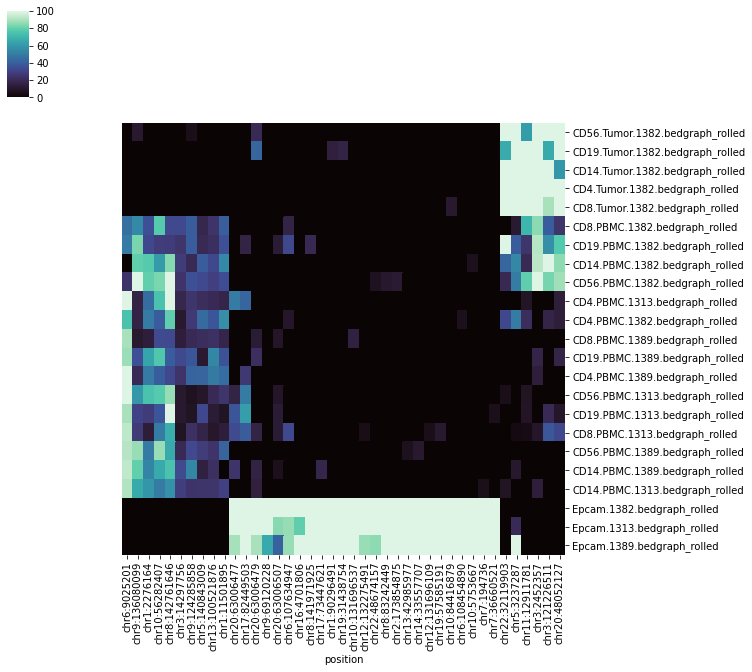

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
adata=refData
import seaborn as sns
subTypes = pd.DataFrame
subTypes = adata.columns
type_pal = sns.husl_palette(adata.columns.size, s=0.7)
lut = dict(zip(adata.columns.unique(), type_pal))
row_colors = subTypes.map(lut)
sns_plot = sns.clustermap(adata.T, cmap="mako", robust=True,row_cluster=False,col_cluster=False)
plt.show()